## CSCS530 Winter 2016
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2016)

  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2016
  * Schedule: Wednesdays and Friday, 1:00-2:30PM ET
  * Location: 120 West Hall (http://www.lsa.umich.edu/cscs/research/computerlab)
  * Teachers: [Mike Bommarito](https://www.linkedin.com/in/bommarito) and [Sarah Cherng](https://www.linkedin.com/pub/sarah-cherng/35/1b7/316)


## PD (Game Theory) Model

  We'll implement the PD model as described in our [Easley & Kleinberg reading here](https://github.com/mjbommar/cscs-530-w2016/raw/master/readings/easley-kleinberg-networks-crowds-markets-ch6.pdf).

In [2]:
%matplotlib inline

import numpy.random
import matplotlib.pyplot as plt

In [3]:
# Setup payoffs
payoff_map = {("NC", "NC"): (-1, -1),
             ("NC", "C"): (-10, 0),
             ("C", "NC"): (0, -10),
             ("C", "C"): (-4, -4)}

In [4]:
my_payoff, your_payoff = payoff_map[("NC", "C")]
print("I got {0}".format(my_payoff))
print("You got {0}".format(your_payoff))

I got -10
You got 0


In [5]:
prob_confess = 0.5

class Player(object):
    """
    Player object.
    """
    
    def __init__(self, payoff_map, prob_confess):
        """
        Constructor
        """
        self.payoff_map = payoff_map
        self.prob_confess = prob_confess
        self.previous_game_payoffs = []
        self.other_player_action = []
        
    def get_action(self):
        """
        Randomly draw action given prob_confess.
        """
        if numpy.random.random() <= prob_confess:
            return "C"
        else:
            return "NC"
        

class AlwaysCUntilDPlayer(object):
    """
    Always cooperates until the other defects.
    
    N.B.: We'll learn about inheritance later.
    """
    def __init__(self, payoff_map, memory=None):
        """
        Constructor
        """
        self.payoff_map = payoff_map
        self.memory = memory
        self.previous_game_payoffs = []
        self.other_player_action = []
        
    def get_action(self):
        """
        Randomly draw action given prob_confess.
        """
        if self.memory: 
            if self.other_player_action[(-self.memory):].count("C") > 0:
                return "C"
            else:
                return "NC"
        else:
            if self.other_player_action.count("C") > 0:
                return "C"
            else:
                return "NC"

In [6]:
player_a = Player(payoff_map, prob_confess)
player_b = Player(payoff_map, prob_confess)

In [7]:
player_a.get_action()

'C'

In [8]:
class Game(object):
    """
    Game class which stores the two players, their actions, and outcome.
    """
    
    def __init__(self, player_a, player_b):
        """
        Constructor
        """
        self.player_a = player_a
        self.player_b = player_b
        
    def run(self):
        """
        Run the game.
        """
        # Draw the actions/strategies of the players
        self.strategy_a = self.player_a.get_action()
        self.strategy_b = self.player_b.get_action()
        
        # Calculate the outcomes
        self.payoff_a, self.payoff_b = payoff_map[(self.strategy_a, self.strategy_b)]
        self.total_payoff = self.payoff_a + self.payoff_b
        self.average_payoff = (self.payoff_a + self.payoff_b) / 2.0
        
        # Update player memories
        self.player_a.previous_game_payoffs.append(self.payoff_a)
        self.player_b.previous_game_payoffs.append(self.payoff_b)
        self.player_a.other_player_action.append(self.strategy_b)
        self.player_b.other_player_action.append(self.strategy_a)

In [9]:
# Create players
player_a = Player(payoff_map, prob_confess)
player_b = AlwaysCUntilDPlayer(payoff_map, memory=5)

In [10]:
# Create the game
g = Game(player_a, player_b)

# Run the game
g.run()

print("The strategies were {0}, {1}".format(g.strategy_a, g.strategy_b))
print("The total payoff was {0} and the average payoff was {1}"\
        .format(g.total_payoff, g.average_payoff))
print(player_a.other_player_action)

The strategies were C, NC
The total payoff was -10 and the average payoff was -5.0
['NC']


In [11]:
# Set number of games to run
num_games = 100
game_history = []
total_payoff_history = []

# Create players
player_a = Player(payoff_map, prob_confess)
player_b = Player(payoff_map, prob_confess)

for i in range(num_games):
    # Create and run the game
    g = Game(player_a, player_b)
    g.run()
    
    # Append to the history
    total_payoff_history.append(g.total_payoff)
    game_history.append(g)

In [12]:
# Set number of games to run
num_games = 100
game_history = []
total_payoff_history = []


player_a_prob_confess_values = [0.01, 0.1, 0.5, 0.9]
player_b_memory_values = [1, 5, 10, 15, 20]

for player_a_prob_confess in player_a_prob_confess_values:
    for player_b_memory in player_b_memory_values:
        # Create players
        player_a = Player(payoff_map, player_a_prob_confess)
        player_b = Player(payoff_map, player_b_memory)

        for i in range(num_games):
            # Create and run the game
            g = Game(player_a, player_b)
            g.run()

            # Append to the history
            total_payoff_history.append((player_a_prob_confess, player_b_memory, g.total_payoff))
            game_history.append(g)

In [14]:
import pandas
df = pandas.DataFrame(total_payoff_history, columns=["prob_confess", "memory", "payoff"])
df.head()

,prob_confess,memory,payoff
0,0.01,1,-8
1,0.01,1,-8
2,0.01,1,-10
3,0.01,1,-8
4,0.01,1,-10


In [15]:
# Show groupbys in each dimension
df.groupby("memory")["payoff"].mean()

memory
1    -7.675
5    -7.270
10   -7.505
15   -7.430
20   -7.645
Name: payoff, dtype: float64

In [16]:
# Show groupbys in each dimension
df.groupby("prob_confess")["payoff"].mean()

prob_confess
0.01   -7.568
0.10   -7.428
0.50   -7.412
0.90   -7.612
Name: payoff, dtype: float64

In [17]:
# Show groupbys in each dimension
df.groupby(["prob_confess", "memory"])["payoff"].mean()

prob_confess  memory
0.01          1        -7.56
              5        -7.10
              10       -7.70
              15       -7.36
              20       -8.12
0.10          1        -7.96
              5        -7.22
              10       -7.60
              15       -7.08
              20       -7.28
0.50          1        -7.40
              5        -7.12
              10       -7.22
              15       -7.48
              20       -7.84
0.90          1        -7.78
              5        -7.64
              10       -7.50
              15       -7.80
              20       -7.34
Name: payoff, dtype: float64

In [18]:
# Joint and unstack
df.groupby(["prob_confess", "memory"])["payoff"].mean().unstack()

memory,1,5,10,15,20
prob_confess,,,,,
0.01,-7.56,-7.10,-7.70,-7.36,-8.12
0.10,-7.96,-7.22,-7.60,-7.08,-7.28
0.50,-7.40,-7.12,-7.22,-7.48,-7.84
0.90,-7.78,-7.64,-7.50,-7.80,-7.34


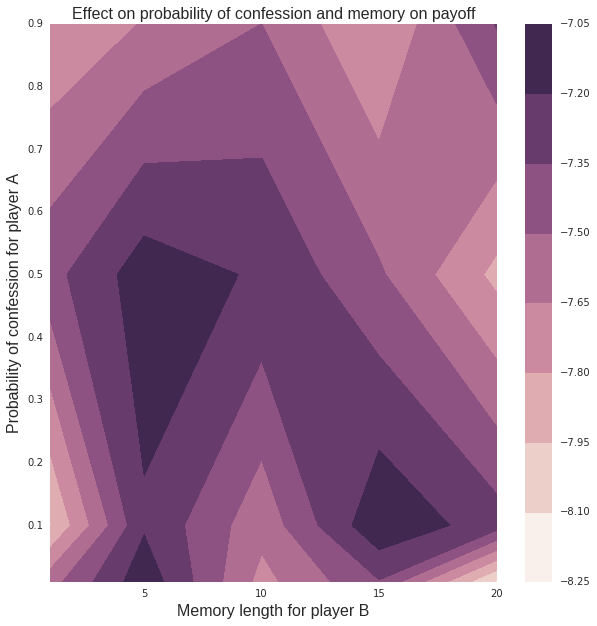

In [23]:
# Joint and unstack
payoff_surface = df.groupby(["prob_confess", "memory"])["payoff"].mean().unstack()

# Plot surface
import seaborn
f = plt.figure(figsize=(10, 10))
_ = plt.contourf(payoff_surface.columns, payoff_surface.index, payoff_surface, cmap = seaborn.cubehelix_palette(light=1, as_cmap=True),
                 shade=True)
_ = plt.colorbar()
_ = plt.title("Effect on probability of confession and memory on payoff",
              fontsize=16)
_ = plt.ylabel("Probability of confession for player A", fontsize=16)
_ = plt.xlabel("Memory length for player B", fontsize=16)